27122
['E09000019' 'E09000004' 'E09000025' 'E09000011' 'E09000003' 'E09000007'
 'E09000005' 'E06000039' 'E09000006' 'E09000018' 'E09000030' 'E09000010'
 'E09000029' 'E09000023' 'E09000009' 'E09000022' 'E09000033' 'E09000026'
 'E09000014' 'E09000002' 'E09000032' 'E09000008' 'E09000015' 'E09000012'
 'E09000028' 'E09000031' 'E09000021' 'E09000013' 'E09000024' 'E09000027'
 'E09000017' 'E09000016' 'E07000215' 'E09000001' 'E07000111' 'E07000102'
 'E09000020' 'E07000068' 'E06000034' 'E07000072' 'E07000211' 'E07000095'
 'E07000006' 'E07000207' 'E06000040']
    Cal year  incident_count
0       2009            2507
1       2010            1910
2       2011            2296
3       2012            1794
4       2013            1482
5       2014            1794
6       2015            1677
7       2016            1815
8       2017            1870
9       2018            1463
10      2019            1439
11      2020            1382
12      2021            1330
13      2022            1360
14      20

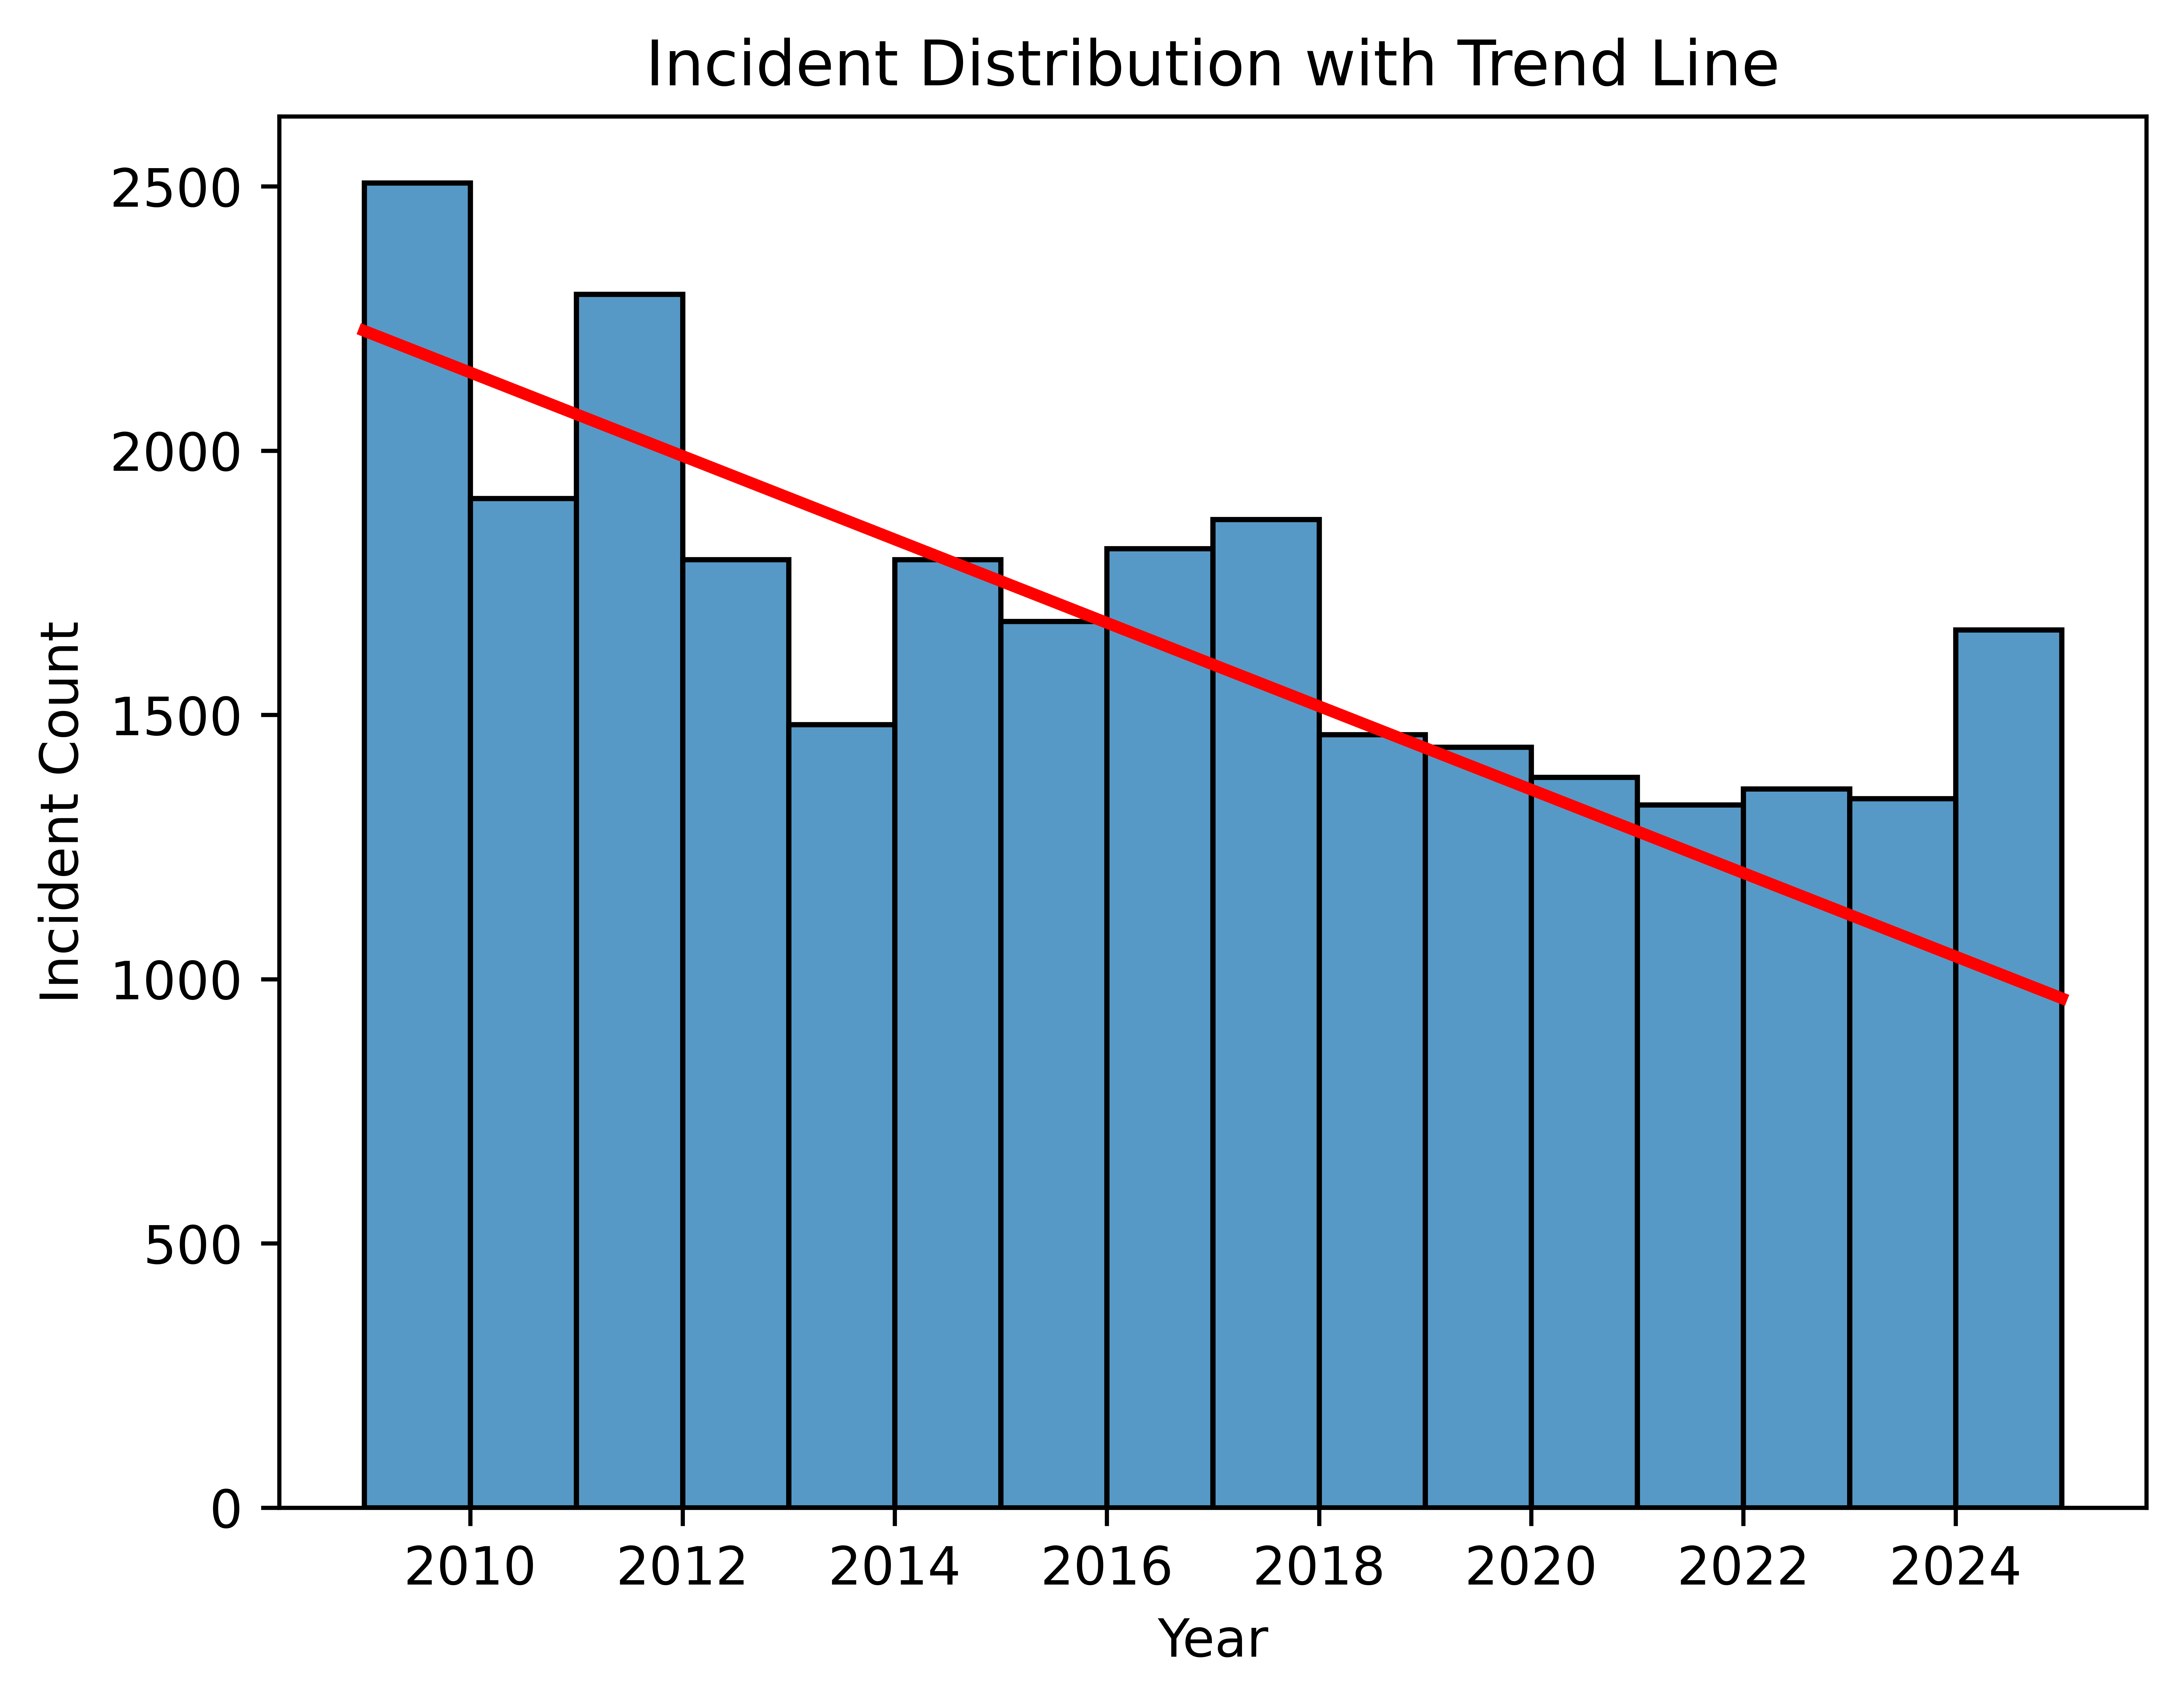

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("Bonfire, Christmas, Diwali and Haloween incidents.csv")
print(len(df))
# Count number of incidents per year
incident_counts = df.groupby("Cal year").size().reset_index(name="incident_count")

# # Safely convert the "Borough" column to strings, handle NaNs as empty strings
# df["Borough Codes"] = df["Borough Codes"].astype(str).str.strip().str.title()

# # Replace placeholder strings for NaNs back to proper NaN
# df["Borough"].replace("Nan", pd.NA, inplace=True)

# Get unique borough names after normalization
all_boroughs = df["Borough code"].dropna().unique()
print(all_boroughs)


# Check the aggregated data
print(incident_counts)

# Create a histogram of incidents per year
sns.histplot(incident_counts, x="Cal year", weights="incident_count", bins=16, kde=False)

# Add a regression line
sns.regplot(data=incident_counts, x="Cal year", y="incident_count", scatter=False, color="red", ci=None)

plt.xlabel("Year")
plt.ylabel("Incident Count")
plt.title("Incident Distribution with Trend Line")
plt.gcf().set_dpi(1200)  # Adjust DPI (higher values = sharper image)
plt.show()

# Count the number of unique Borough codes


(29948, 3)
Incident Type
Guy Fawkes    13837
Christmas     10881
Diwali         5230
Name: count, dtype: int64


<Figure size 2400x1200 with 0 Axes>

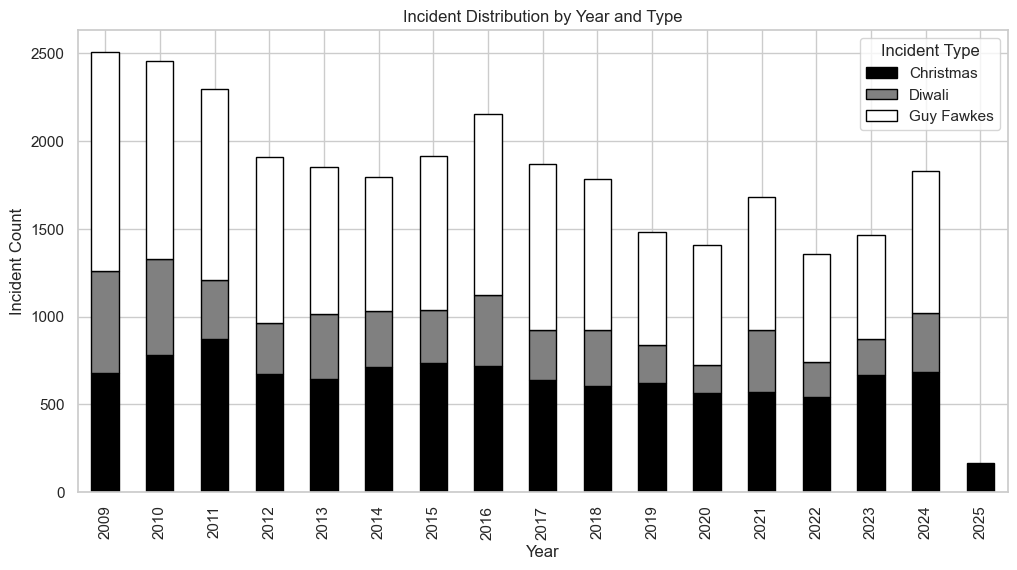

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("Bonfire, Christmas, Diwali and Haloween incidents.csv")

# Melt data so that 'Diwali', 'Christmas', 'Guy Fawkes' are in a single column
df_melted = df.melt(id_vars=["Cal year"], value_vars=["Diwali", "Christmas", "Guy Fawkes"], 
                     var_name="Incident Type", value_name="Occurred")
df_melted = df_melted[df_melted["Occurred"] == 1]  # Keep only incidents that happened

# 📌 Apply modern styles
sns.set_theme(style="whitegrid")
sns.set_palette("muted")  
plt.figure(figsize=(12, 6), dpi=200)  

# ✅ Convert "Cal year" to numeric for proper ordering
df_melted["Cal year"] = df_melted["Cal year"].astype(int)

print(df_melted.shape)
print(df_melted["Incident Type"].value_counts())

df_grouped = df_melted.groupby(["Cal year", "Incident Type"]).size().reset_index(name="Counts")
# pivot so each incident type is a column
df_pivot = df_grouped.pivot(index="Cal year", columns="Incident Type", values="Counts").fillna(0)

df_pivot.plot(
    kind="bar", stacked=True, edgecolor="black",
    figsize=(12,6), colormap="grey"
)

plt.title("Incident Distribution by Year and Type")
plt.xlabel("Year")
plt.ylabel("Incident Count")
plt.legend(title="Incident Type")
plt.show()



Incident Type  Christmas  Diwali  Guy Fawkes
Cal year                                    
2009               680.0   582.0      1245.0
2010               781.0   548.0      1129.0
2011               871.0   341.0      1084.0
2012               673.0   294.0       943.0
2013               643.0   374.0       839.0


<Figure size 14400x7200 with 0 Axes>

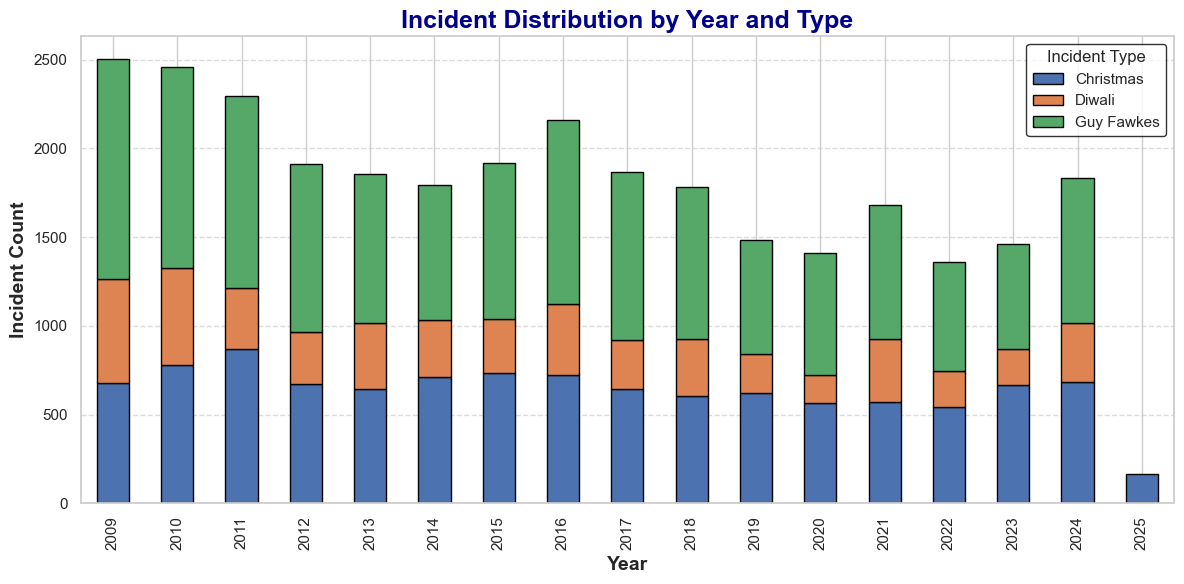

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("Bonfire, Christmas, Diwali and Haloween incidents.csv")

# Melt data so that 'Diwali', 'Christmas', 'Guy Fawkes' are in a single column
df_melted = df.melt(id_vars=["Cal year"], value_vars=["Diwali", "Christmas", "Guy Fawkes"], 
                     var_name="Incident Type", value_name="Occurred")
df_melted = df_melted[df_melted["Occurred"] == 1]  # Keep only incidents that happened

# 📌 Apply modern styles
sns.set_theme(style="whitegrid")
sns.set_palette("muted")  
plt.figure(figsize=(12, 6), dpi=1200)  

# ✅ Convert "Cal year" to numeric for proper ordering
df_melted["Cal year"] = df_melted["Cal year"].astype(int)
df_grouped = (
    df_melted
    .groupby(["Cal year", "Incident Type"])
    .size()
    .reset_index(name="Count")
)

# Pivot so each Incident Type is a column
df_pivot = df_grouped.pivot(index="Cal year", columns="Incident Type", values="Count").fillna(0)
print(df_pivot.head())  # Verify structure

sns.set_theme(style="whitegrid")   # keep the Seaborn look
df_pivot.plot(
    kind="bar", 
    stacked=True, 
    figsize=(12,6), 
    edgecolor="black", 
    # colormap="inferno"
)
plt.title("Incident Distribution by Year and Type", fontsize=18, fontweight="bold", color="darkblue")
plt.xlabel("Year", fontsize=14, fontweight="bold")
plt.ylabel("Incident Count", fontsize=14, fontweight="bold")
plt.legend(title="Incident Type", fontsize=11, frameon=True, edgecolor="black")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.savefig("incident_styled.png", dpi=1200, bbox_inches="tight")
plt.show()

<Figure size 16800x8400 with 0 Axes>

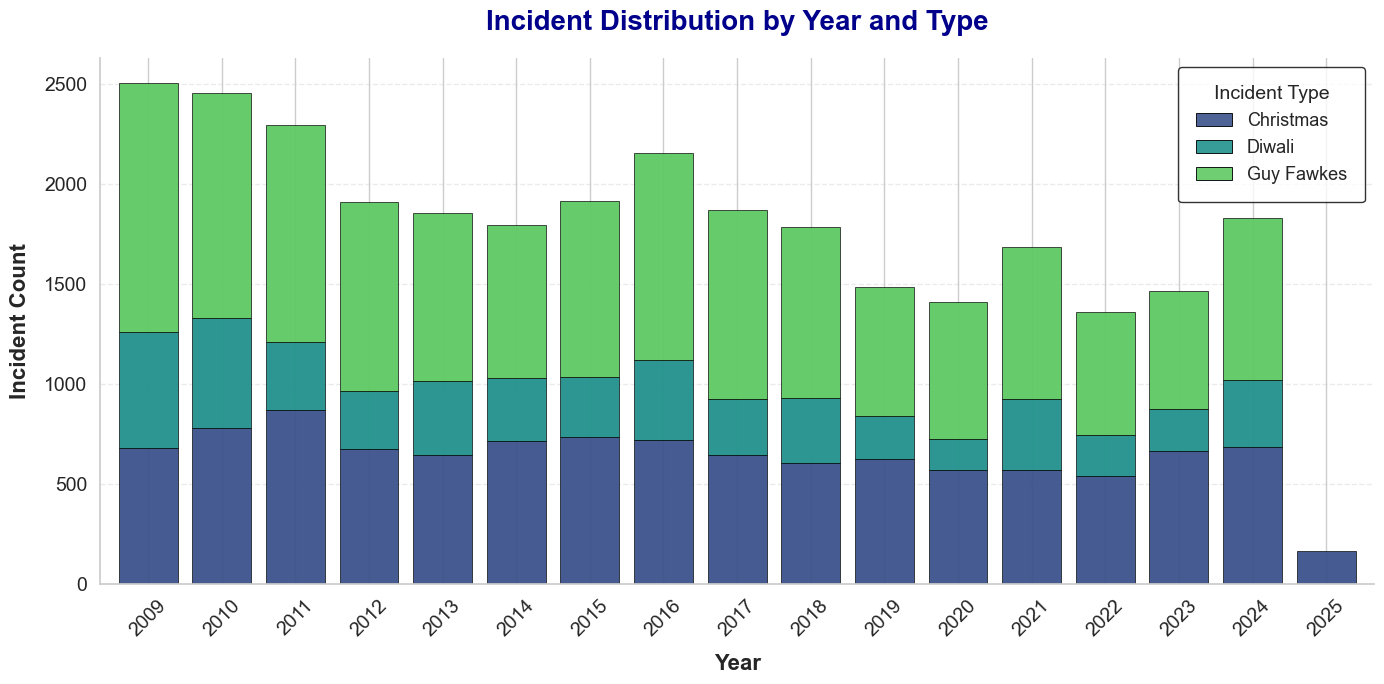

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Bonfire, Christmas, Diwali and Haloween incidents.csv")

# Melt data so that 'Diwali', 'Christmas', 'Guy Fawkes' are in a single column
df_melted = df.melt(id_vars=["Cal year"], value_vars=["Diwali", "Christmas", "Guy Fawkes"], 
                     var_name="Incident Type", value_name="Occurred")
df_melted = df_melted[df_melted["Occurred"] == 1]  # Keep only incidents that happened

# ✅ Convert "Cal year" to numeric for proper ordering
df_melted["Cal year"] = df_melted["Cal year"].astype(int)
df_grouped = (
    df_melted
    .groupby(["Cal year", "Incident Type"])
    .size()
    .reset_index(name="Count")
)

# Pivot so each Incident Type is a column
df_pivot = df_grouped.pivot(index="Cal year", columns="Incident Type", values="Count").fillna(0)

# 📌 **Apply Ultimate Modern Styles**
sns.set_theme(style="whitegrid")   
plt.figure(figsize=(14, 7), dpi=1200)  # Bigger & sharper figure
custom_palette = sns.color_palette("viridis", n_colors=3)  # Luxurious modern colors

# 🎨 **Create a Super Clean Stacked Bar Chart**
ax = df_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(14,7),
    color=custom_palette,  # Custom color palette
    edgecolor="black",
    linewidth=0.7,  # Thin but visible borders
    alpha=0.9,  # Slight transparency
    width=0.8
)

# 🔥 **Enhance the Visuals**
plt.title("Incident Distribution by Year and Type", fontsize=20, fontweight="bold", color="darkblue", pad=20)
plt.xlabel("Year", fontsize=16, fontweight="bold", labelpad=10)
plt.ylabel("Incident Count", fontsize=16, fontweight="bold", labelpad=10)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# 📌 **Refine the Legend**
plt.legend(
    title="Incident Type",
    fontsize=13,
    title_fontsize=14,
    frameon=True,
    fancybox=True,  # Softer, rounded look
    framealpha=0.8,  # Slight transparency
    borderpad=1,  # Spacing around text
    edgecolor="black",
)

# 🎭 **Subtle Shadow Effect**
for bar in ax.containers:
    for b in bar:
        b.set_linewidth(0.5)  # Slight edges
        b.set_alpha(0.95)  # Uniform transparency

# 🏆 **Add finishing touches**
plt.grid(axis="y", linestyle="--", alpha=0.4)  # Lighter, modern gridlines
sns.despine()  # Remove excess borders for a clean look
plt.tight_layout()

# Save high-quality image
plt.savefig("incident_styled_modern.png", dpi=1200, bbox_inches="tight")

# Show
plt.show()


TypeError: Axis.set_ticks() missing 1 required positional argument: 'ticks'

/Users/davidakintoye/test_env/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) Arial.

/Users/davidakintoye/test_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) Arial.



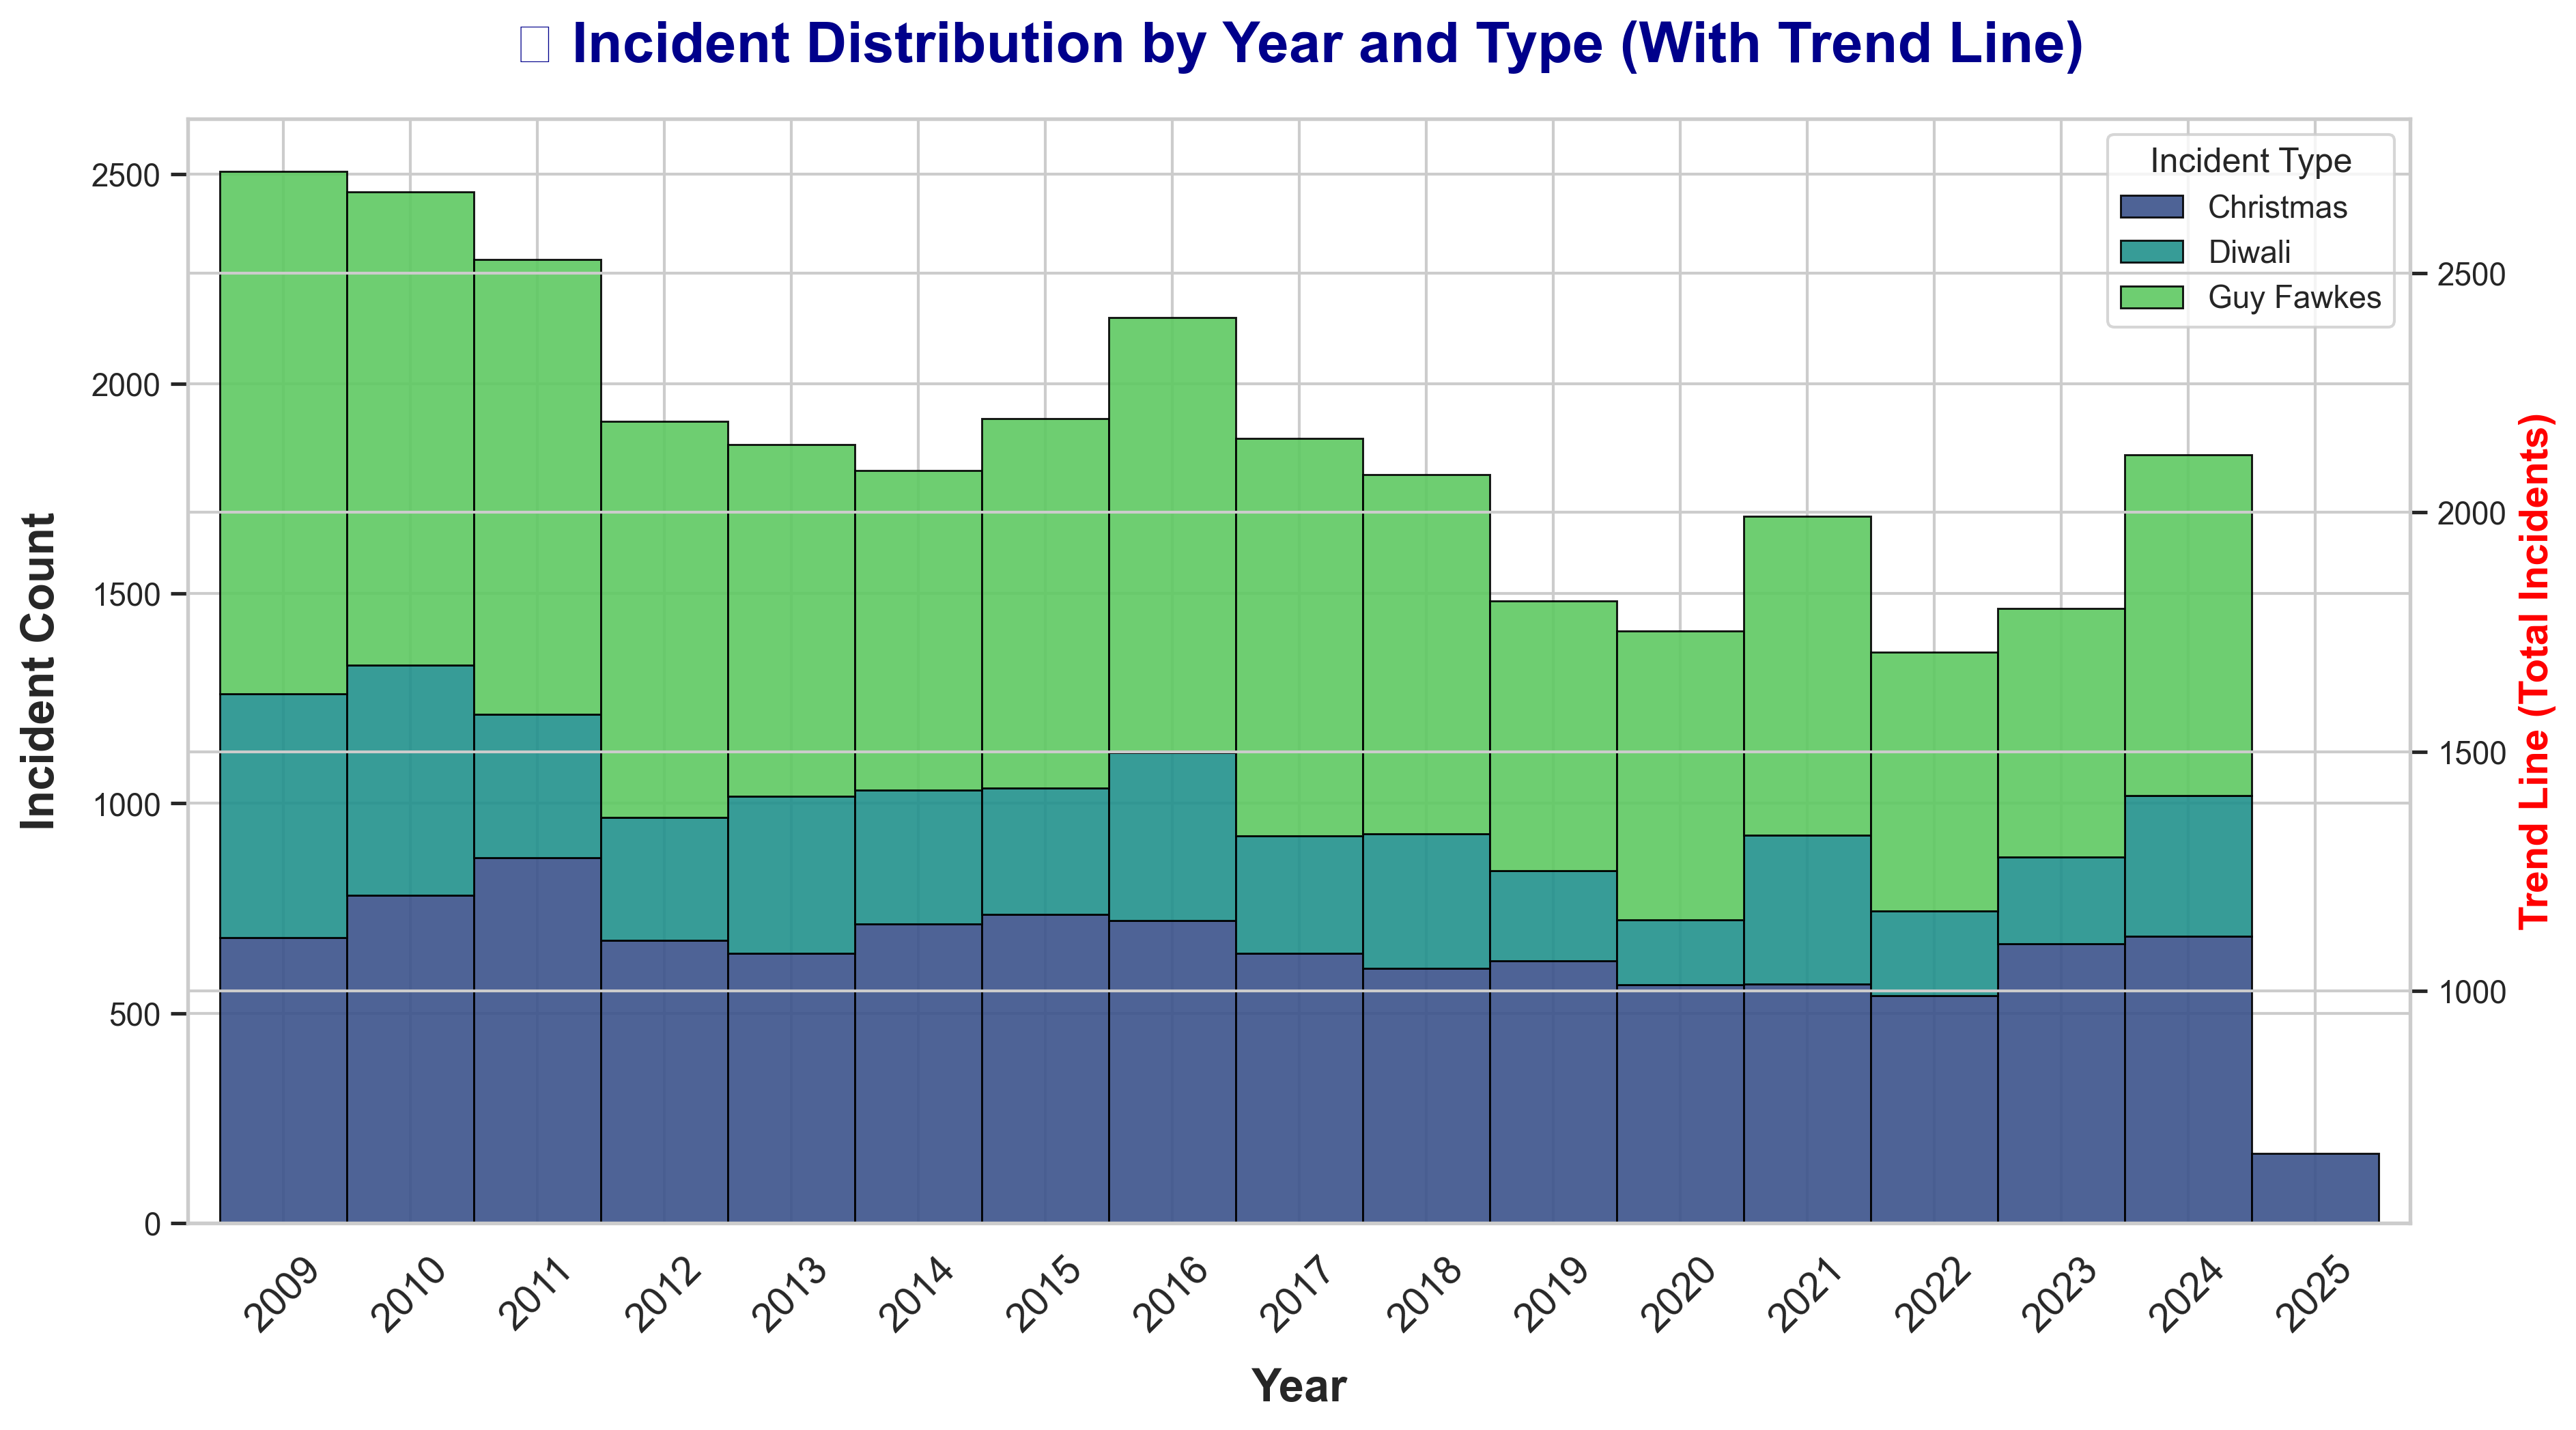

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("Bonfire, Christmas, Diwali and Haloween incidents.csv")

# Melt data so that 'Diwali', 'Christmas', 'Guy Fawkes' are in a single column
df_melted = df.melt(id_vars=["Cal year"], value_vars=["Diwali", "Christmas", "Guy Fawkes"], 
                     var_name="Incident Type", value_name="Occurred")
df_melted = df_melted[df_melted["Occurred"] == 1]  # Keep only incidents that happened

# ✅ Convert "Cal year" to numeric for proper ordering
df_melted["Cal year"] = df_melted["Cal year"].astype(int)
df_grouped = (
    df_melted
    .groupby(["Cal year", "Incident Type"])
    .size()
    .reset_index(name="Count")
)

# Pivot so each Incident Type is a column
df_pivot = df_grouped.pivot(index="Cal year", columns="Incident Type", values="Count").fillna(0)

# ✅ Calculate total incidents per year for regression
df_pivot["Total Incidents"] = df_pivot.sum(axis=1)

# 📌 **Apply Ultimate Modern Styles**
sns.set_theme(style="whitegrid")   
fig, ax = plt.subplots(figsize=(14, 7), dpi=300)  # Bigger & sharper figure
custom_palette = sns.color_palette("viridis", n_colors=3)  # Luxurious modern colors

# 🎨 **Create a Stacked Bar Chart with Touching Bars**
df_pivot.drop(columns=["Total Incidents"]).plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color=custom_palette,  # Custom color palette
    edgecolor="black",
    linewidth=0.7,  # Thin but visible borders
    alpha=0.9,  # Slight transparency
    width=1  # 🔥 Make bars touch
)

# 🔥 **Overlay Regression Line (on Secondary Y-Axis)**
ax2 = ax.twinx()  # Create a secondary y-axis
sns.regplot(
    x=df_pivot.index, 
    y=df_pivot["Total Incidents"], 
    scatter=False,  # Don't show scatter points
    color="red", 
    line_kws={"linewidth": 2, "linestyle": "dashed"},  # Dashed trend line
    ax=ax2
)

# 📌 **Enhance the Visuals**
ax.set_title("🔥 Incident Distribution by Year and Type (With Trend Line)", fontsize=20, fontweight="bold", color="darkblue", pad=20)
ax.set_xlabel("Year", fontsize=16, fontweight="bold", labelpad=10)
ax.set_ylabel("Incident Count", fontsize=16, fontweight="bold", labelpad=10)
ax2.set_ylabel("Trend Line (Total Incidents)", fontsize=14, fontweight="bold", color="red")  # Label for regression line

ax.set_xticks(range(len(df_pivot.index)))
ax.set_xticklabels(df_pivot.index, fontsize=14, rotation=45)
ax.set_yticks(fontsize=14)
ax2.set_yticks([])  # Hide secondary Y-axis ticks

# 📌 **Refine the Legend**
ax.legend(
    title="Incident Type",
    fontsize=13,
    title_fontsize=14,
    frameon=True,
    fancybox=True,  # Softer, rounded look
    framealpha=0.8,  # Slight transparency
    borderpad=1.5,  # Spacing around text
    edgecolor="black",
)

# 🎭 **Subtle Shadow Effect**
for bar in ax.containers:
    for b in bar:
        b.set_linewidth(0.5)  # Slight edges
        b.set_alpha(0.95)  # Uniform transparency

# 🏆 **Add finishing touches**
ax.grid(axis="y", linestyle="--", alpha=0.4)  # Lighter, modern gridlines
sns.despine()  # Remove excess borders for a clean look
plt.tight_layout()

# Save high-quality image
plt.savefig("incident_styled_regression.png", dpi=1200, bbox_inches="tight")

# Show
plt.show()


In [52]:
!pip install --no-user --upgrade seaborn


/var/folders/wx/dqj4jqsj1hq4nc4wdh_qmzhh0000gn/T/ipykernel_95245/411971021.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Cal year"] = df_filtered["Cal year"].astype(int)


<Figure size 16800x8400 with 0 Axes>

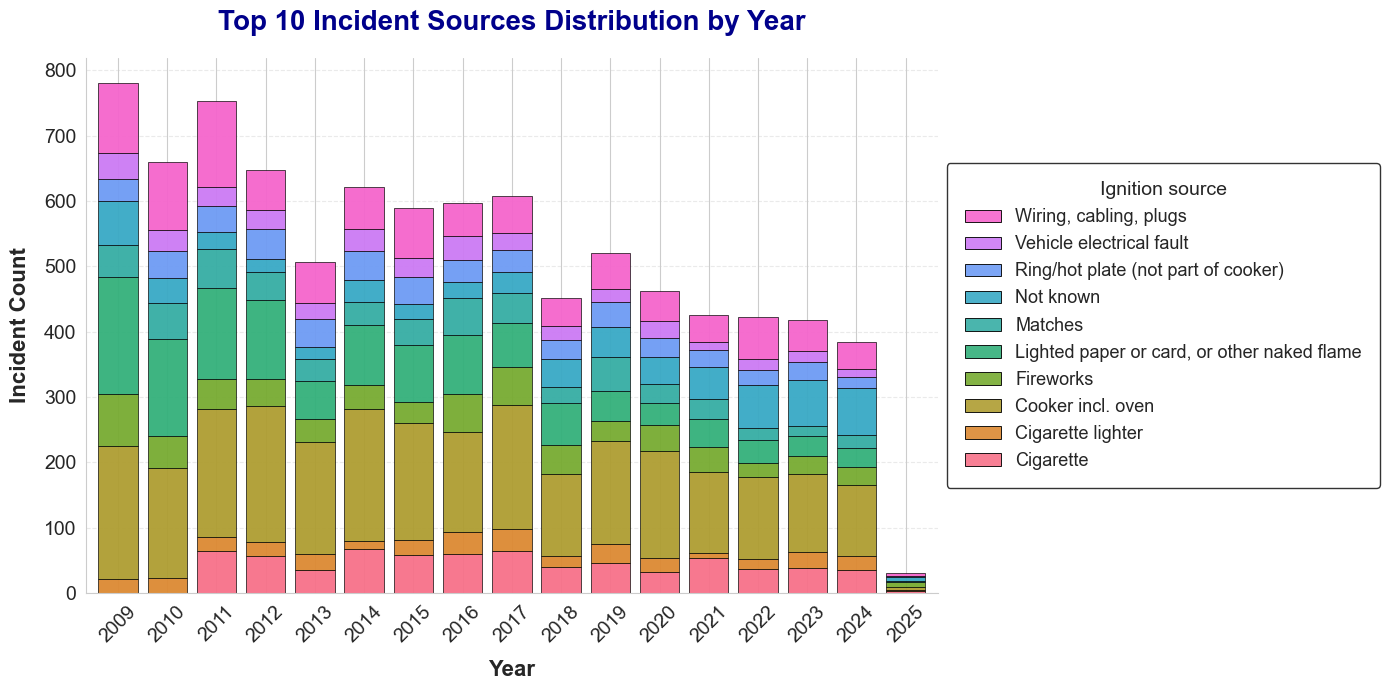

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Bonfire, Christmas, Diwali and Haloween incidents.csv")

# Get top 10 ignition sources by frequency
top_sources = df['Ignition source'].value_counts().head(10).index

# Filter dataframe to only include top sources
df_filtered = df[df['Ignition source'].isin(top_sources)]

# Convert "Cal year" to numeric for proper ordering
df_filtered["Cal year"] = df_filtered["Cal year"].astype(int)
df_grouped = (
    df_filtered
    .groupby(["Cal year", "Ignition source"])
    .size()
    .reset_index(name="Count")
)

# Pivot so each Incident Type is a column
df_pivot = df_grouped.pivot(index="Cal year", columns="Ignition source", values="Count").fillna(0)

# Apply Ultimate Modern Styles
sns.set_style(style="whitegrid")   
plt.figure(figsize=(14, 7), dpi=1200)  # Bigger & sharper figure

# Create a perceptually uniform colormap for better distinction
custom_palette = sns.color_palette("husl", n_colors=len(top_sources))

# Create a Super Clean Stacked Bar Chart
ax = df_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(14,7),
    color=custom_palette,  # Custom color palette
    edgecolor="black",
    linewidth=0.7,  # Thin but visible borders
    alpha=0.9,  # Slight transparency
    width=0.8
)

# Enhance the Visuals
plt.title("Top 10 Incident Sources Distribution by Year", fontsize=20, fontweight="bold", color="darkblue", pad=20)
plt.xlabel("Year", fontsize=16, fontweight="bold", labelpad=10)
plt.ylabel("Incident Count", fontsize=16, fontweight="bold", labelpad=10)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.legend(
    title="Ignition source",
    fontsize=13,
    title_fontsize=14,
    frameon=True,
    fancybox=True,  # Softer, rounded look
    framealpha=0.8,  # Slight transparency
    borderpad=1,  # Spacing around text
    edgecolor="black",
    loc='center left',  # Position outside right of plot
    bbox_to_anchor=(1, 0.5),  # Anchor point for legend
    reverse=True 
)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0,0,0.8,1])

# Subtle Shadow Effect
for bar in ax.containers:
    for b in bar:
        b.set_linewidth(0.5)  # Slight edges
        b.set_alpha(0.95)  # Uniform transparency

# Add finishing touches
plt.grid(axis="y", linestyle="--", alpha=0.4)  # Lighter, modern gridlines
sns.despine()  # Remove excess borders for a clean look
plt.tight_layout()

# Save high-quality image
plt.savefig("incident_source_modern.png", dpi=1200, bbox_inches="tight")

# Show
plt.show()

In [21]:

# Count how many rows are null
null_count = df['Ignition source'].isnull().sum()
print("Number of nulls:", null_count)

x = df['Ignition source'].count()
print(x)

print(f"Percentage of un-identified Ignition sources are {null_count/x}")

Number of nulls: 11951
15171
Percentage of un-identified Ignition sources are 0.7877529497066772


['Cooker incl. oven', 'Lighted paper or card, or other naked flame', 'Wiring, cabling, plugs', 'Cigarette', 'Not known', 'Fireworks', 'Matches', 'Ring/hot plate (not part of cooker)', 'Vehicle electrical fault', 'Cigarette lighter', 'Electrical intake head/Main fuse', 'Liquids; petrol/oil related', 'Microwave oven', 'Candles/Tea lights - Social use', 'Grill/Toaster', 'Other', 'Batteries, generators', 'Fuse board/Consumer unit', 'Smoking materials (not cigarette)', 'Unknown vehicle fault', 'Engine, fuel line or pump', 'Washing machine', 'Heating/Fire', 'Fluorescent lights', 'Other heating equipment', 'Tumble dryer - Standard', 'Other appliance or equipment', 'Other cooking appliance', 'Candle or tea light', 'Other lights', 'Deep fat fryer', 'Candles/Tea lights - Religious use', 'Spot lights', 'Other industrial equipment', 'Extractor fan', 'Central heating/Hot water', 'Other domestic style appliance', 'Spread from secondary fire', 'Extension lead', 'Other incandescent light bulbs', 'Oil/

<Figure size 16800x8400 with 0 Axes>

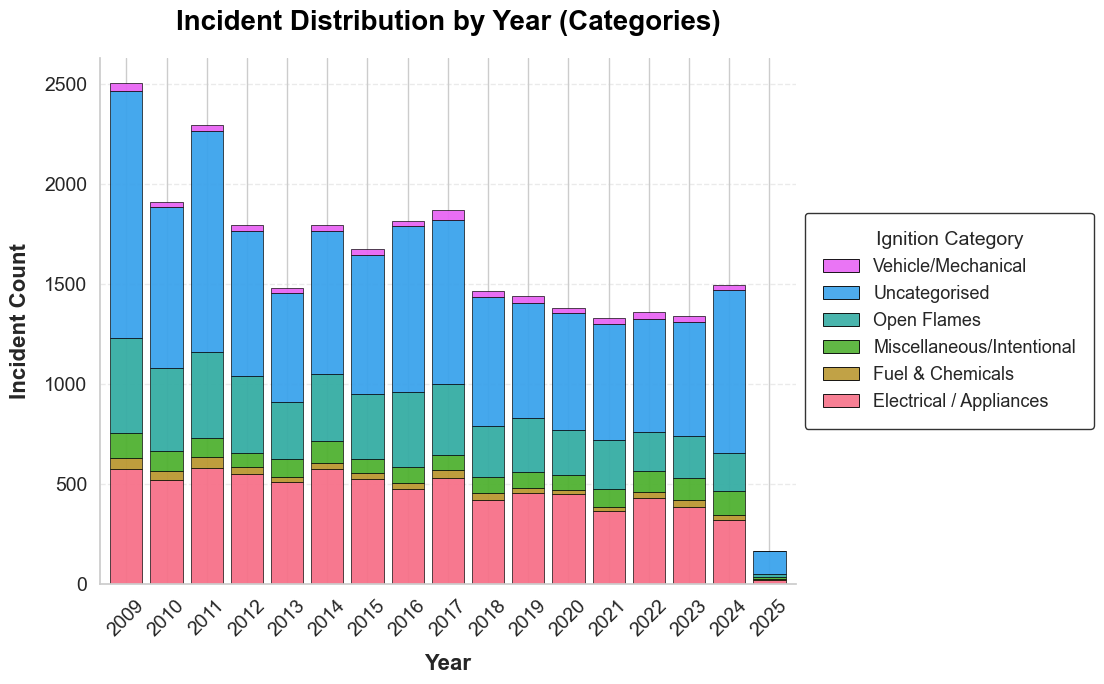

In [30]:
all_sources = df['Ignition source'].value_counts().index.to_list()
print(all_sources)
print(len(all_sources))

# Category: Electrical Sources & Appliances
electrical_sources = [
    # Wiring/Components & Distribution
    "Wiring, cabling, plugs",
    "Electrical intake head/Main fuse",
    "Fuse board/Consumer unit",
    "Extension lead",
    "Smart meter on electricity supply",
    
    # Electrical Appliances & Devices
    "Microwave oven",
    "Grill/Toaster",
    "Television",
    "Fridge/Freezer - Freestanding",
    "Fridge/Freezer",
    "Fridge - Integrated",
    "PC/Computer terminal",
    "Electric kettle",
    "Hair dryer",
    "Electric blanket",
    "Tumble dryer - Standard",
    "Tumble dryer - Condensing",
    "Tumble dryer - Heat pump",
    "Dishwasher",
    "Battery charger",
    "Other electrical visual equipment",
    "Other appliance or equipment",
    "Other domestic style appliance",
    
    # Vehicle Electrical Issues
    "Vehicle electrical fault",
    
    # Other Electric Equipment
    "Batteries, generators",
    "Power Source",
    "E-Bike",
    "E-Scooter",
    'Video/DVD',
    'Panel heater (electric)',
    'Food warming equipment (not cooking)',
    'Central heating/Hot water',          # typically building systems (sometimes electric)
    'Spot lights',
    'e-Smoking equipment (e-cigarette or similar)',
    'Fan heater',
    'Storage heater (electric)',
    'Water heating (not central heating)', # standalone water heaters are often electric
    'Extractor fan',
    'Cooker incl. oven',
    'Iron',
    'Freezer - Freestanding',
    'Fairy lights',
    'Spin dryer',
    'Electricity meter',
    'Freezer - Integrated',
    'Oil filled radiator',
    'Other incandescent light bulbs',
    'Other cooking appliance',
    'Vacuum cleaner',
    'Lift',
    'Fluorescent lights',
    'Fridge - Freestanding',
    'Halogen heater',
    'Deep fat fryer',
    'Other computer equipment',
    'Washing machine',
    'Computer equipment (domestic use)',
    'Washer/Dryer combined',
    'Fridge/Freezer - Integrated',
    'Other heating equipment',
    'Other lights',
    'Audio equipment',
    'Telephone/Answering machine/Fax machine',
    'Industrial dryer'
]

# Category: Open Flames & Combustible Ignitions
open_flames = [
    "Lighted paper or card, or other naked flame",
    "Cigarette",
    "Cigarette lighter",
    "Smoking materials (not cigarette)",
    "Matches",
    "Candles/Tea lights - Social use",
    "Candles/Tea lights - Religious use",
    "Candles/Tea lights - Secondary lighting",
    "Fireworks",
    "Ring/hot plate (not part of cooker)",
    'Blow lamp/Paint remover',   # uses flame or high heat
    'Camping stove',             # typically fuel-based open flame
    'Welding/Cutting equipment', # produces sparks/arc heat
    'Candle or tea light'
]

# Category: Fuel, Chemical & Combustible Materials
fuel_chemicals = [
    "Liquids; petrol/oil related",
    "Flammable chemicals",
    "Gases",
    "Solids; coal, coke, wood, card",
    "Oil/Incense burners",
    "Barbecue",
    'Wet hay'  # combustible organic material
]

# Category: Vehicle & Mechanical Faults (Non-Electrical)
vehicle_mechanical_faults = [
    "Unknown vehicle fault",
    "Other non-electrical vehicle fault",
    "Engine, fuel line or pump",
    "Wheels or brakes"
]

# Category: Miscellaneous / Uncertain / Intentional
miscellaneous = [
    "Not known",
    "Other",
    "Intentional burning - out of control",
    "Incendiary device",
    "Bomb/Explosives",
    "Natural occurrence",
    'Gardening equipment',       # ambiguous – may include gas or manual tools
    'Other industrial equipment',# too generic to classify as electrical
    'Chimney',                   # part of building structure, not an appliance
    'Heating/Fire',              # ambiguous description
    'Spread from secondary fire',# represents fire propagation rather than an ignition source
    'Manufacturing equipment',   # broad category – may be non-domestic
    'Patio equipment',           # ambiguous outdoor equipment
    'Kiln, oven, furnace',       # industrial or specialised heating; often fuel-fired
    'Exhausts'                   # components of ventilation systems
]

# Optional: Print out the groups and verify counts
print("Electrical Sources & Appliances:", electrical_sources)
print("Count:", len(electrical_sources))
print("Open Flames & Combustible Ignitions:", open_flames)
print("Count:", len(open_flames))
print("Fuel, Chemical & Combustible Materials:", fuel_chemicals)
print("Count:", len(fuel_chemicals))
print("Vehicle & Mechanical Faults (Non-Electrical):", vehicle_mechanical_faults)
print("Count:", len(vehicle_mechanical_faults))
print("Miscellaneous / Uncertain / Intentional:", miscellaneous)
print("Count:", len(miscellaneous))

# Total count of grouped items:
total_grouped = (len(electrical_sources) + len(open_flames) + 
                 len(fuel_chemicals) + len(vehicle_mechanical_faults) + len(miscellaneous))
print("Total grouped items:", total_grouped)

def map_to_category(ign_source):
    if ign_source in electrical_sources:
        return "Electrical / Appliances"
    elif ign_source in open_flames:
        return "Open Flames"
    elif ign_source in fuel_chemicals:
        return "Fuel & Chemicals"
    elif ign_source in vehicle_mechanical_faults:
        return "Vehicle/Mechanical"
    elif ign_source in miscellaneous:
        return "Miscellaneous/Intentional"
    else:
        return "Uncategorised"

df["Category"] = df["Ignition source"].apply(map_to_category)
# Group by (Year, Category), then count
df_grouped = (
    df.groupby(["Cal year", "Category"])
      .size()
      .reset_index(name="Count")
)

# Pivot so each Category is its own column
df_pivot = df_grouped.pivot(index="Cal year", columns="Category", values="Count").fillna(0)

print(df_pivot.head())  # Quick peek
# Apply aesthetic style
sns.set_style("whitegrid")

# Figure size & resolution
plt.figure(figsize=(14, 7), dpi=1200)

# Create a color palette with as many colors as categories in df_pivot.columns
num_categories = len(df_pivot.columns)
custom_palette = sns.color_palette("husl", n_colors=num_categories)

# Plot
ax = df_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 7),
    color=custom_palette,
    edgecolor="black",
    linewidth=0.7,
    alpha=0.9,
    width=0.8
)

# Enhance the Visuals
plt.title("Incident Distribution by Year (Categories)", 
          fontsize=20, fontweight="bold", color="black", pad=20)
plt.xlabel("Year", fontsize=16, fontweight="bold", labelpad=10)
plt.ylabel("Incident Count", fontsize=16, fontweight="bold", labelpad=10)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Legend styling
plt.legend(
    title="Ignition Category",
    fontsize=13,
    title_fontsize=14,
    frameon=True,
    fancybox=True,
    framealpha=0.8,
    borderpad=1,
    edgecolor="black",
    loc='center left',
    bbox_to_anchor=(1, 0.5),  # push legend right
    reverse=True
)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0,0,0.8,1])

# Subtle shadow effect
for bar in ax.containers:
    for b in bar:
        b.set_linewidth(0.5)
        b.set_alpha(0.95)

# Light grid lines, remove top/right spines
plt.grid(axis="y", linestyle="--", alpha=0.4)
sns.despine()

# Save & Show
plt.savefig("incident_categories_new_modern.png", dpi=1200, bbox_inches="tight")
plt.show()



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Category"] = df["Ignition source"].apply(map_to_category)
df = df[df["Category"] != "Uncategorised"]
df = df[df["Cal year"] != 2025]

# Group by (Year, Category), then count
df_grouped = (
    df.groupby(["Cal year", "Category"])
      .size()
      .reset_index(name="Count")
)

# Pivot so each Category is its own column
df_pivot = df_grouped.pivot(index="Cal year", columns="Category", values="Count").fillna(0)

# Create a color palette for the number of categories
num_categories = len(df_pivot.columns)
new_palette = sns.color_palette("tab10", n_colors=num_categories)

# Apply a whitegrid style
sns.set_style("whitegrid")

# Create a figure
plt.figure(figsize=(12, 6), dpi=1200)

# Plot each category as a line on the same axes
ax = df_pivot.plot(
    kind="line",
    color=new_palette,
    marker='o',          # Optional: add markers
    linewidth=2,         # Thicker lines for visibility
    alpha=0.9,           # Slight transparency
    ax=plt.gca()         # Plot on the current axes
)

# Enhance the visuals
plt.title("Incidents Over Time by Category", fontsize=20, fontweight="bold", color="darkblue", pad=20)
plt.xlabel("Year", fontsize=16, fontweight="bold", labelpad=10)
plt.ylabel("Incident Count", fontsize=16, fontweight="bold", labelpad=10)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Move the legend to the right side
plt.legend(
    title="Category",
    fontsize=12,
    title_fontsize=13,
    frameon=True,
    fancybox=True,
    framealpha=0.8,
    borderpad=1,
    edgecolor="black",
    loc='center left',      # Anchor legend to the center left of the bbox
    bbox_to_anchor=(1, 0.5)   # Position the bbox outside on the right
)

# Subtle grid & despine
plt.grid(axis="y", linestyle="--", alpha=0.4)
sns.despine()

plt.tight_layout()

# Save high-quality image (optional)
plt.savefig("incidents_by_category_line.png", dpi=1200, bbox_inches="tight")

plt.show()



In [5]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


df = pd.read_csv("Bonfire, Christmas, Diwali and Haloween incidents.csv")

# Category: Electrical Sources & Appliances
electrical_sources = [
    # Wiring/Components & Distribution
    "Wiring, cabling, plugs",
    "Electrical intake head/Main fuse",
    "Fuse board/Consumer unit",
    "Extension lead",
    "Smart meter on electricity supply",
    
    # Electrical Appliances & Devices
    "Microwave oven",
    "Grill/Toaster",
    "Television",
    "Fridge/Freezer - Freestanding",
    "Fridge/Freezer",
    "Fridge - Integrated",
    "PC/Computer terminal",
    "Electric kettle",
    "Hair dryer",
    "Electric blanket",
    "Tumble dryer - Standard",
    "Tumble dryer - Condensing",
    "Tumble dryer - Heat pump",
    "Dishwasher",
    "Battery charger",
    "Other electrical visual equipment",
    "Other appliance or equipment",
    "Other domestic style appliance",

    # Vehicle Electrical Issues
    "Vehicle electrical fault",
    
    # Other Electric Equipment
    "Batteries, generators",
    "Power Source",
    "E-Bike",
    "E-Scooter",
    'Video/DVD',
    'Panel heater (electric)',
    'Food warming equipment (not cooking)',
    'Central heating/Hot water',          # typically building systems (sometimes electric)
    'Spot lights',
    'e-Smoking equipment (e-cigarette or similar)',
    'Fan heater',
    'Storage heater (electric)',
    'Water heating (not central heating)', # standalone water heaters are often electric
    'Extractor fan',
    'Cooker incl. oven',
    'Iron',
    'Freezer - Freestanding',
    'Fairy lights',
    'Spin dryer',
    'Electricity meter',
    'Freezer - Integrated',
    'Oil filled radiator',
    'Other incandescent light bulbs',
    'Other cooking appliance',
    'Vacuum cleaner',
    'Lift',
    'Fluorescent lights',
    'Fridge - Freestanding',
    'Halogen heater',
    'Deep fat fryer',
    'Other computer equipment',
    'Washing machine',
    'Computer equipment (domestic use)',
    'Washer/Dryer combined',
    'Fridge/Freezer - Integrated',
    'Other heating equipment',
    'Other lights',
    'Audio equipment',
    'Telephone/Answering machine/Fax machine',
    'Industrial dryer'
]

# Category: Open Flames & Combustible Ignitions
open_flames = [
    "Lighted paper or card, or other naked flame",
    "Cigarette",
    "Cigarette lighter",
    "Smoking materials (not cigarette)",
    "Matches",
    "Candles/Tea lights - Social use",
    "Candles/Tea lights - Religious use",
    "Candles/Tea lights - Secondary lighting",
    "Fireworks",
    "Ring/hot plate (not part of cooker)",
    'Blow lamp/Paint remover',   # uses flame or high heat
    'Camping stove',             # typically fuel-based open flame
    'Welding/Cutting equipment', # produces sparks/arc heat
    'Candle or tea light'
]

# Category: Fuel, Chemical & Combustible Materials
fuel_chemicals = [
    "Liquids; petrol/oil related",
    "Flammable chemicals",
    "Gases",
    "Solids; coal, coke, wood, card",
    "Oil/Incense burners",
    "Barbecue",
    'Wet hay'  # combustible organic material
]

# Category: Vehicle & Mechanical Faults (Non-Electrical)
vehicle_mechanical_faults = [
    "Unknown vehicle fault",
    "Other non-electrical vehicle fault",
    "Engine, fuel line or pump",
    "Wheels or brakes"
]

# Category: Miscellaneous / Uncertain / Intentional
miscellaneous = [
    # "Not known",
    # "Other",
    "Intentional burning - out of control",
    "Incendiary device",
    "Bomb/Explosives",
    "Natural occurrence",
    'Gardening equipment',       # ambiguous – may include gas or manual tools
    'Other industrial equipment',# too generic to classify as electrical
    'Chimney',                   # part of building structure, not an appliance
    'Heating/Fire',              # ambiguous description
    'Spread from secondary fire',# represents fire propagation rather than an ignition source
    'Manufacturing equipment',   # broad category – may be non-domestic
    'Patio equipment',           # ambiguous outdoor equipment
    'Kiln, oven, furnace',       # industrial or specialised heating; often fuel-fired
    'Exhausts'                   # components of ventilation systems
]

def map_to_category(ign_source):
    if ign_source in electrical_sources:
        return "Electrical / Appliances"
    elif ign_source in open_flames:
        return "Open Flames"
    elif ign_source in fuel_chemicals:
        return "Fuel & Chemicals"
    elif ign_source in vehicle_mechanical_faults:
        return "Vehicle/Mechanical"
    elif ign_source in miscellaneous:
        return "Miscellaneous/Intentional"
    else:
        return "Uncategorised"
        
df['Category'] = df['Ignition source'].apply(map_to_category)

uncategorised_count = df['Category'].value_counts().get('Uncategorised', 0)

# Print the count
print(f"Number of rows mapped to 'Uncategorised': {uncategorised_count}")

df = df[df[['Diwali', 'Guy Fawkes', 'Halloween', 'Christmas']].sum(axis=1) <= 1]

# Function to create a single 'Holiday' feature from the holiday columns
def get_holiday(row):
    if row['Diwali'] == 1:
        return "Diwali"
    elif row['Guy Fawkes'] == 1:
        return "Guy Fawkes"
    elif row['Halloween'] == 1:
        return "Halloween"
    elif row['Christmas'] == 1:
        return "Christmas"
    else:
        return "None"

df['Holiday'] = df.apply(get_holiday, axis=1)

# Map the detailed ignition source to a broader category (assuming you have defined map_to_category)

# Select the features and target variable
features = df[['Holiday', 'Property Category', 'Month', 'Borough code']]
target = df['Category']

# One-hot encode the categorical features
features_encoded = pd.get_dummies(features, drop_first=True)

# Partition data into training and testing sets with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Train a standard decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classification model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Number of rows mapped to 'Uncategorised': 12896
Model Accuracy: 0.7157578359811078


In [125]:
import datetime

def get_day_of_week(year, month, day):
    """
    Returns an integer 0-6 representing Monday-Sunday for the given date.
    """
    date_obj = datetime.date(year, month, day)
    return date_obj.weekday()

# Example usage
dow = get_day_of_week(2023, 3, 15)  # e.g., 2 means Wednesday if Monday=0
print("Day of week (0=Mon, 6=Sun):", dow)

# Optionally, convert to a weekday name:
DAY_NAMES = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
print("Day name:", DAY_NAMES[dow])

Day of week (0=Mon, 6=Sun): 2
Day name: Wednesday


In [122]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0
max_i = 0
# for i in range (1, 1000):
rf_clf = RandomForestClassifier(
    n_estimators=8,    # number of trees in the forest
    random_state=436,
    max_depth=None,      # you could set a limit if you want to prevent overfitting
    # min_samples_split=2, etc.
)
rf_clf.fit(X_train, y_train)

# --------------- EVALUATE THE RANDOM FOREST MODEL ---------------
new_y_pred = rf_clf.predict(X_test)
new_accuracy = accuracy_score(y_test, new_y_pred)
if (new_accuracy>max_accuracy):
    max_i = i
    max_accuracy = new_accuracy
if (i%50 == 0):
    print(i)
        
print("Decision Tree Accuracy:", accuracy)
print("Random Forest Accuracy:", max_accuracy)

Decision Tree Accuracy: 0.5811080111598246
Random Forest Accuracy: 0.5894778796333201


In [80]:
print(max_i)

436


In [1]:
!pip install scikit-learn

In [2]:
!which python

/Users/davidakintoye/alphasport-design/analyse/form/seleniumenv/bin/python
